In [1]:
import pandas as pd

## MEASURING MOVIE "POPULARITY" WITH SCATTER PLOT

Combined imdb.title.ratings and imdb.title.basics to draw a comparison between the average movie rating, and the number of times it was rated. I then made a scatter plot to assess if there is a correlation between the two, to gather insight on whether the number of ratings is a measure of popularity.

In [3]:
rotten = pd.read_csv('rt.movie_info.tsv.gz', delimiter="\t")
#initialized a dataframe to access a database containing rotten tomatos reviews

In [4]:
rtreviews = pd.read_csv('rt.reviews.tsv.gz', sep="\t", encoding='latin-1')

In [5]:
imdbreviews = pd.read_csv("imdb.title.ratings.csv.gz")

In [6]:
basics = pd.read_csv('imdb.title.basics.csv.gz')

In [7]:
imdbreviews.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
imdb = basics.merge(imdbreviews, on="tconst", how="inner")

In [11]:
imdb.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [12]:
imdb

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [22]:
imdb = imdb.drop_duplicates(subset=["primary_title"])

In [23]:
imdb.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [25]:
imdb["primary_title"].describe()

count                               69813
unique                              69813
top       Rebecca H. (Return to the Dogs)
freq                                    1
Name: primary_title, dtype: object

In [26]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Movie Popularity: Rating vs # of Times Rated')

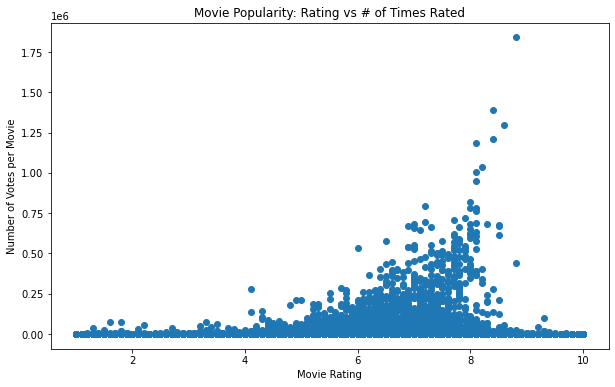

In [30]:
scatter_title = "Movie Popularity: Rating vs # of Times Rated"
xlabel = "Movie Rating"
ylabel = "Number of Votes per Movie"

imdb_pop, ax = plt.subplots(figsize=(10,6))
xx=imdb["averagerating"]
yy=imdb["numvotes"]

ax.scatter(xx,yy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

## END POPULARITY MEASURING HERE

## BEGIN: RELATIONSHIP BETWEEN BUDGET AND AVG MOVIE RATING

In [33]:
budgetinfo = pd.read_csv("tn.movie_budgets.csv.gz")
#import budget numbers

In [34]:
budgetinfo.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [35]:
#rewrite the release_date to isolate the year in the release date
budgetinfo['release_date'] = budgetinfo['release_date'].str[-4:]

In [44]:
#dropping the dollar sign in the production_budget numbers
budgetinfo['production_budget'] = budgetinfo['production_budget'].str.replace('$', '')
#dropping the commas in production_budget numbers
budgetinfo['production_budget'] = budgetinfo['production_budget'].str.replace(',', '')

In [43]:
budgetinfo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425_000_000,"$760,507,625","$2,776,345,279"
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410_600_000,"$241,063,875","$1,045,663,875"
2,3,2019,Dark Phoenix,350_000_000,"$42,762,350","$149,762,350"
3,4,2015,Avengers: Age of Ultron,330_600_000,"$459,005,868","$1,403,013,963"
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317_000_000,"$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,2018,Red 11,7_000,$0,$0
5778,79,1999,Following,6_000,"$48,482","$240,495"
5779,80,2005,Return to the Land of Wonders,5_000,"$1,338","$1,338"
5780,81,2015,A Plague So Pleasant,1_400,$0,$0


In [45]:
#dropping the dollar sign and commas in the domestic_gross numbers
budgetinfo['domestic_gross'] = budgetinfo['domestic_gross'].str.replace('$', '')
budgetinfo['domestic_gross'] = budgetinfo['domestic_gross'].str.replace(',', '')
#dropping the dollar sign and commas in the worldwide_gross numbers
budgetinfo['worldwide_gross'] = budgetinfo['worldwide_gross'].str.replace('$', '')
budgetinfo['worldwide_gross'] = budgetinfo['worldwide_gross'].str.replace(',', '')
budgetinfo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425_000_000,760507625,2776345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410_600_000,241063875,1045663875
2,3,2019,Dark Phoenix,350_000_000,42762350,149762350
3,4,2015,Avengers: Age of Ultron,330_600_000,459005868,1403013963
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317_000_000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018,Red 11,7_000,0,0
5778,79,1999,Following,6_000,48482,240495
5779,80,2005,Return to the Land of Wonders,5_000,1338,1338
5780,81,2015,A Plague So Pleasant,1_400,0,0


In [46]:
#convert altered numbers to floats
budgetinfo['worldwide_gross'] = budgetinfo['worldwide_gross'].astype(float)
budgetinfo['production_budget'] = budgetinfo['production_budget'].astype(float)
budgetinfo['domestic_gross'] = budgetinfo['domestic_gross'].astype(float)
budgetinfo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999,Following,6000.0,48482.0,2.404950e+05
5779,80,2005,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015,A Plague So Pleasant,1400.0,0.0,0.000000e+00


We have successfully imported the budget information and converted the columns to workable numbers.

Now, we are going to create an ID column that will allow us to combine the IMDB data with the BudgetInfo data frame.

In [47]:
budgetinfo["merge_id"] = budgetinfo["release_date"] + " " + budgetinfo["movie"]

In [48]:
budgetinfo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,merge_id
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09,2009 Avatar
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011 Pirates of the Caribbean: On Stranger Tides
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019 Dark Phoenix
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015 Avengers: Age of Ultron
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017 Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...
5777,78,2018,Red 11,7000.0,0.0,0.000000e+00,2018 Red 11
5778,79,1999,Following,6000.0,48482.0,2.404950e+05,1999 Following
5779,80,2005,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005 Return to the Land of Wonders
5780,81,2015,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015 A Plague So Pleasant


In [49]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [51]:
imdb["merge_id"] = imdb["start_year"].astype(str) + " " + imdb["primary_title"]
imdb

<ipython-input-51-8cd98a71fbf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["merge_id"] = imdb["start_year"].astype(str) + " " + imdb["primary_title"]


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,merge_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2013 Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,2019 One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018 The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,2018 Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,2017 The Wandering Soap Opera
...,...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,2019 Padmavyuhathile Abhimanyu
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,2019 Swarm Season
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,2019 Diabolik sono io
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,2019 Sokagin Çocuklari


In [146]:
#locating documentaries in pre-merge
imdb.loc[imdb["genres"] == "Documentary"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,merge_id
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,2013 Cooper and Hemingway: The True Gen
11,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6,2018 T.G.M. - osvoboditel
20,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary,7.8,22,2012 Akakis mogzauroba
26,tt0285423,Abolição,Abolição,2019,NaN,Documentary,7.4,35,2019 Abolição
73,tt0417750,Hempsters: Plant the Seed,Hempsters: Plant the Seed,2010,90.0,Documentary,7.5,107,2010 Hempsters: Plant the Seed
...,...,...,...,...,...,...,...,...,...
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,Documentary,8.7,10,2019 Band Together with Logic
73840,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218,2019 Ott Tänak: The Movie
73843,tt9905476,Hand Rolled,Hand Rolled,2019,90.0,Documentary,9.3,13,2019 Hand Rolled
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,2019 Swarm Season


In [148]:
budgetinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   merge_id           5782 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 316.3+ KB


In [52]:
#We now have created a matching merge_id for both IMDB and BudgetInfo data frames. We will now combine these two data frames

In [61]:
movie_data = imdb.set_index("merge_id").join(budgetinfo.set_index("merge_id"),how="inner")

In [62]:
movie_data=movie_data.reset_index()

In [64]:
movie_data

,merge_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2010 127 Hours,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,323949,6,2010,127 Hours,18000000.0,18335230.0,6.021717e+07
1,2010 8: The Mormon Proposition,tt1484522,8: The Mormon Proposition,8: The Mormon Proposition,2010,80.0,Documentary,7.0,1190,38,2010,8: The Mormon Proposition,2500000.0,100280.0,1.002800e+05
2,2010 A Nightmare on Elm Street,tt1179056,A Nightmare on Elm Street,A Nightmare on Elm Street,2010,95.0,"Crime,Drama,Horror",5.2,85497,49,2010,A Nightmare on Elm Street,35000000.0,63075011.0,1.177296e+08
3,2010 Alice in Wonderland,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",6.5,358813,51,2010,Alice in Wonderland,200000000.0,334191110.0,1.025491e+09
4,2010 All Good Things,tt1175709,All Good Things,All Good Things,2010,101.0,"Crime,Drama,Mystery",6.3,49684,96,2010,All Good Things,20000000.0,582024.0,8.736170e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,2019 UglyDolls,tt1946502,UglyDolls,UglyDolls,2019,87.0,"Adventure,Animation,Comedy",4.5,1176,6,2019,UglyDolls,45000000.0,19894664.0,2.464466e+07
1363,2019 Unplanned,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,33,2019,Unplanned,6000000.0,18107621.0,1.810762e+07
1364,2019 Velvet Buzzsaw,tt7043012,Velvet Buzzsaw,Velvet Buzzsaw,2019,113.0,"Horror,Mystery,Thriller",5.7,40213,82,2019,Velvet Buzzsaw,21000000.0,0.0,0.000000e+00
1365,2019 What Men Want,tt7634968,What Men Want,What Men Want,2019,117.0,"Comedy,Fantasy,Romance",4.9,10141,21,2019,What Men Want,20000000.0,54611903.0,6.991190e+07


In [65]:
movie_data = movie_data[["merge_id","release_date","genres","averagerating","numvotes","production_budget","domestic_gross","worldwide_gross"]]

In [66]:
movie_data

,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
0,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07
1,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05
2,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08
3,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09
4,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05
...,...,...,...,...,...,...,...,...
1362,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07
1363,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07
1364,2019 Velvet Buzzsaw,2019,"Horror,Mystery,Thriller",5.7,40213,21000000.0,0.0,0.000000e+00
1365,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07


Text(0.5, 1.0, 'Production Budget vs Rating')

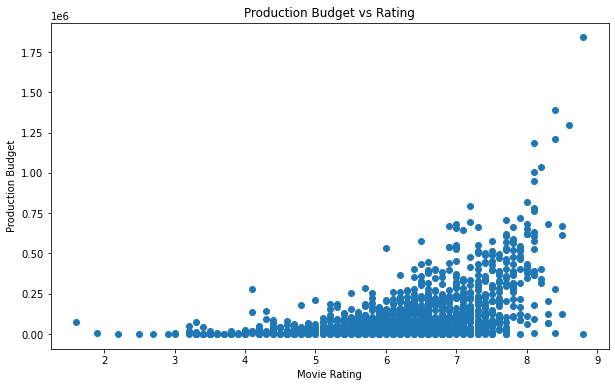

In [67]:
#see if there is an existing relationship between average rating and the production budget

scatter_title = "Production Budget vs Rating"
xlabel = "Movie Rating"
ylabel = "Production Budget"

productionrating, ax = plt.subplots(figsize=(10,6))
xxx=movie_data["averagerating"]
yyy=movie_data["numvotes"]

ax.scatter(xxx,yyy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

In [69]:
#Run correlation number 0-1
movie_data.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
averagerating,1.000000,0.501268,0.223337,0.324176,0.305625
numvotes,0.501268,1.000000,0.543428,0.668745,0.654304
production_budget,0.223337,0.543428,1.000000,0.711112,0.785121
domestic_gross,0.324176,0.668745,0.711112,1.000000,0.943418
worldwide_gross,0.305625,0.654304,0.785121,0.943418,1.000000


Text(0.5, 1.0, 'Production Budget vs Domestic Gross')

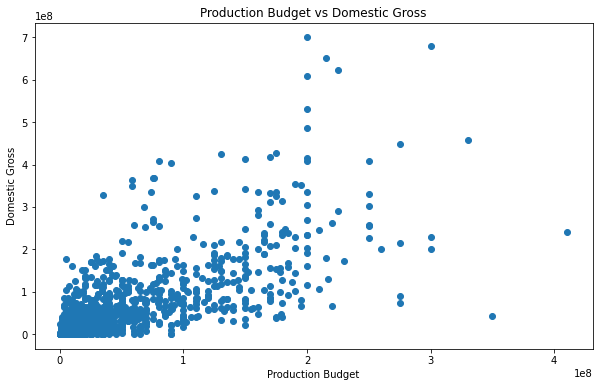

In [72]:
#compare production budget to domestic gross
scatter_title = "Production Budget vs Domestic Gross"
ylabel = "Domestic Gross"
xlabel = "Production Budget"

productiondomestic, ax = plt.subplots(figsize=(10,6))
yyyy=movie_data["domestic_gross"]
xxxx=movie_data["production_budget"]

ax.scatter(xxxx,yyyy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

In [71]:
movie_data

,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
0,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07
1,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05
2,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08
3,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09
4,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05
...,...,...,...,...,...,...,...,...
1362,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07
1363,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07
1364,2019 Velvet Buzzsaw,2019,"Horror,Mystery,Thriller",5.7,40213,21000000.0,0.0,0.000000e+00
1365,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07


Text(0.5, 1.0, 'Production Budget vs Worldwide Gross')

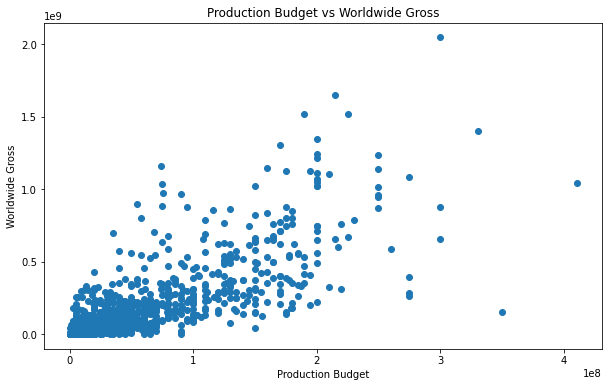

In [73]:
#compare production budget to WORLDWIDE gross
scatter_title = "Production Budget vs Worldwide Gross"
ylabel = "Worldwide Gross"
xlabel = "Production Budget"

productiondomestic, ax = plt.subplots(figsize=(10,6))
yyyyy=movie_data["worldwide_gross"]
xxxxx=movie_data["production_budget"]

ax.scatter(xxxxx,yyyyy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

In [78]:
movies_with_profit = movie_data.loc[movie_data["worldwide_gross"] != 0]
movies_with_profit

,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
0,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07
1,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05
2,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08
3,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09
4,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05
...,...,...,...,...,...,...,...,...
1361,2019 The Secret Life of Pets 2,2019,"Adventure,Animation,Comedy",6.6,3467,80000000.0,63795655.0,1.133515e+08
1362,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07
1363,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07
1365,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07


Text(0.5, 1.0, 'Production Budget vs Worldwide Gross (Profitable Movies Only)')

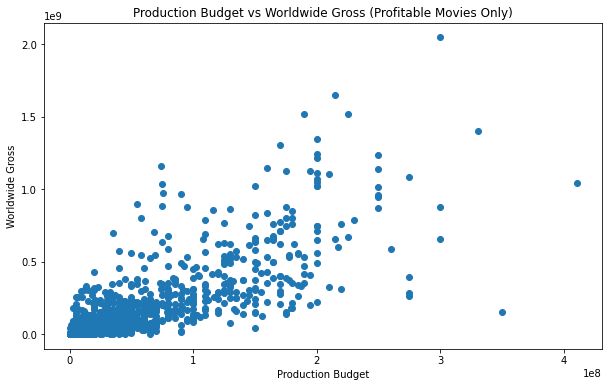

In [79]:
#compare production budget to WORLDWIDE gross, not including any movies with no profits
scatter_title = "Production Budget vs Worldwide Gross (Profitable Movies Only)"
ylabel = "Worldwide Gross"
xlabel = "Production Budget"

productiondomesticprofit, ax = plt.subplots(figsize=(10,6))
yyyyyy=movies_with_profit["worldwide_gross"]
xxxxxx=movies_with_profit["production_budget"]

ax.scatter(xxxxxx,yyyyyy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

In [80]:
movies_with_profit.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
averagerating,1.000000,0.503939,0.184293,0.304338,0.288168
numvotes,0.503939,1.000000,0.526080,0.657774,0.644020
production_budget,0.184293,0.526080,1.000000,0.701319,0.779290
domestic_gross,0.304338,0.657774,0.701319,1.000000,0.941753
worldwide_gross,0.288168,0.644020,0.779290,0.941753,1.000000


There is almost a perfect correlation between domestic gross and worldwide gross. 

A very strong correlation between production budget and your profits, domestic and worldwide - with stronger relationship between production budget and worldwide profit

In [82]:
movies_with_profit["d_profit"] = movies_with_profit["domestic_gross"] - movies_with_profit["production_budget"]
movies_with_profit

<ipython-input-82-060001520960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_profit["d_profit"] = movies_with_profit["domestic_gross"] - movies_with_profit["production_budget"]


,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit
0,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07,335230.0
1,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05,-2399720.0
2,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08,28075011.0
3,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09,134191110.0
4,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05,-19417976.0
...,...,...,...,...,...,...,...,...,...
1361,2019 The Secret Life of Pets 2,2019,"Adventure,Animation,Comedy",6.6,3467,80000000.0,63795655.0,1.133515e+08,-16204345.0
1362,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07,-25105336.0
1363,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07,12107621.0
1365,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07,34611903.0


In [83]:
movies_with_profit["w_profit"] = movies_with_profit["worldwide_gross"] - movies_with_profit["production_budget"]
movies_with_profit

<ipython-input-83-d5b0e16c7566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_profit["w_profit"] = movies_with_profit["worldwide_gross"] - movies_with_profit["production_budget"]


,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit
0,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07,335230.0,42217171.0
1,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05,-2399720.0,-2399720.0
2,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08,28075011.0,82729621.0
3,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09,134191110.0,825491110.0
4,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05,-19417976.0,-19126383.0
...,...,...,...,...,...,...,...,...,...,...
1361,2019 The Secret Life of Pets 2,2019,"Adventure,Animation,Comedy",6.6,3467,80000000.0,63795655.0,1.133515e+08,-16204345.0,33351496.0
1362,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07,-25105336.0,-20355336.0
1363,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07,12107621.0,12107621.0
1365,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07,34611903.0,49911903.0


In [84]:
movies_with_profit.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit
averagerating,1.000000,0.503939,0.184293,0.304338,0.288168,0.253702,0.295063
numvotes,0.503939,1.000000,0.526080,0.657774,0.644020,0.428540,0.626073
production_budget,0.184293,0.526080,1.000000,0.701319,0.779290,0.045213,0.651435
domestic_gross,0.304338,0.657774,0.701319,1.000000,0.941753,0.743827,0.935362
worldwide_gross,0.288168,0.644020,0.779290,0.941753,1.000000,0.589095,0.983109
d_profit,0.253702,0.428540,0.045213,0.743827,0.589095,1.000000,0.700015
w_profit,0.295063,0.626073,0.651435,0.935362,0.983109,0.700015,1.000000


In [104]:
#DETERMINE THE ROI, add Domestic and Worldwide ROI numbers to profitable movies dataframe

movies_with_profit["w_roi"] = movies_with_profit["worldwide_gross"] / movies_with_profit["production_budget"]
movies_with_profit["d_roi"] = movies_with_profit["domestic_gross"] / movies_with_profit["production_budget"]
movies_with_profit



<ipython-input-104-158e4373d31a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_profit["w_roi"] = movies_with_profit["worldwide_gross"] / movies_with_profit["production_budget"]
<ipython-input-104-158e4373d31a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_profit["d_roi"] = movies_with_profit["domestic_gross"] / movies_with_profit["production_budget"]


,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,one,two,three,w_roi,d_roi
0,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07,335230.0,42217171.0,Adventure,Biography,Drama,3.345398,1.018624
1,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05,-2399720.0,-2399720.0,Documentary,None,None,0.040112,0.040112
2,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08,28075011.0,82729621.0,Crime,Drama,Horror,3.363703,1.802143
3,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09,134191110.0,825491110.0,Adventure,Family,Fantasy,5.127456,1.670956
4,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05,-19417976.0,-19126383.0,Crime,Drama,Mystery,0.043681,0.029101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,2019 The Secret Life of Pets 2,2019,"Adventure,Animation,Comedy",6.6,3467,80000000.0,63795655.0,1.133515e+08,-16204345.0,33351496.0,Adventure,Animation,Comedy,1.416894,0.797446
1362,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07,-25105336.0,-20355336.0,Adventure,Animation,Comedy,0.547659,0.442104
1363,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07,12107621.0,12107621.0,Biography,Drama,None,3.017937,3.017937
1365,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07,34611903.0,49911903.0,Comedy,Fantasy,Romance,3.495595,2.730595


## Budget and Genres Analysis

- Starting to combine Budget and 

In [105]:
genre = movies_with_profit
split = genre['genres'].str.split(",", expand = True)
genre['one']= split[0]
genre['two']= split[1]
genre['three']= split[2]


<ipython-input-105-41fbc1e7093e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre['one']= split[0]
<ipython-input-105-41fbc1e7093e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre['two']= split[1]
<ipython-input-105-41fbc1e7093e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [110]:
g2

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,w_roi,d_roi,genre
0,7.6,323949,18000000.0,18335230.0,6.021717e+07,335230.0,42217171.0,3.345398,1.018624,Biography
1,7.0,1190,2500000.0,100280.0,1.002800e+05,-2399720.0,-2399720.0,0.040112,0.040112,None
2,5.2,85497,35000000.0,63075011.0,1.177296e+08,28075011.0,82729621.0,3.363703,1.802143,Drama
3,6.5,358813,200000000.0,334191110.0,1.025491e+09,134191110.0,825491110.0,5.127456,1.670956,Family
4,6.3,49684,20000000.0,582024.0,8.736170e+05,-19417976.0,-19126383.0,0.043681,0.029101,Drama
...,...,...,...,...,...,...,...,...,...,...
1361,6.6,3467,80000000.0,63795655.0,1.133515e+08,-16204345.0,33351496.0,1.416894,0.797446,Animation
1362,4.5,1176,45000000.0,19894664.0,2.464466e+07,-25105336.0,-20355336.0,0.547659,0.442104,Animation
1363,6.3,5945,6000000.0,18107621.0,1.810762e+07,12107621.0,12107621.0,3.017937,3.017937,Drama
1365,4.9,10141,20000000.0,54611903.0,6.991190e+07,34611903.0,49911903.0,3.495595,2.730595,Fantasy


In [119]:
g1 = genre[['averagerating', 'numvotes', 'production_budget', 'domestic_gross', 'worldwide_gross','d_profit','w_profit', 'w_roi', "d_roi", 'one']].rename(columns={'one':'genre'})
g2 = genre[['averagerating', 'numvotes', 'production_budget', 'domestic_gross', 'worldwide_gross','d_profit','w_profit', 'w_roi', "d_roi", 'two']].rename(columns={'two':'genre'})
g3 = genre[['averagerating', 'numvotes', 'production_budget', 'domestic_gross', 'worldwide_gross','d_profit','w_profit', 'w_roi', "d_roi", 'three']].rename(columns={'three':'genre'})
genres_list = [g1, g2, g3]
genres = pd.concat(genres_list)
genres.dropna(inplace=True)

In [120]:
genres

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,w_roi,d_roi,genre
0,7.6,323949,18000000.0,18335230.0,6.021717e+07,335230.0,42217171.0,3.345398,1.018624,Adventure
1,7.0,1190,2500000.0,100280.0,1.002800e+05,-2399720.0,-2399720.0,0.040112,0.040112,Documentary
2,5.2,85497,35000000.0,63075011.0,1.177296e+08,28075011.0,82729621.0,3.363703,1.802143,Crime
3,6.5,358813,200000000.0,334191110.0,1.025491e+09,134191110.0,825491110.0,5.127456,1.670956,Adventure
4,6.3,49684,20000000.0,582024.0,8.736170e+05,-19417976.0,-19126383.0,0.043681,0.029101,Crime
...,...,...,...,...,...,...,...,...,...,...
1360,7.4,10383,25000000.0,0.0,5.227233e+06,-25000000.0,-19772767.0,0.209089,0.000000,Mystery
1361,6.6,3467,80000000.0,63795655.0,1.133515e+08,-16204345.0,33351496.0,1.416894,0.797446,Comedy
1362,4.5,1176,45000000.0,19894664.0,2.464466e+07,-25105336.0,-20355336.0,0.547659,0.442104,Comedy
1365,4.9,10141,20000000.0,54611903.0,6.991190e+07,34611903.0,49911903.0,3.495595,2.730595,Romance


In [121]:
genres["genre"].value_counts()

Drama          611
Comedy         462
Action         396
Adventure      327
Thriller       213
Crime          203
Romance        173
Horror         135
Biography      120
Sci-Fi         116
Fantasy        113
Mystery        107
Animation       95
Family          81
Music           44
History         37
Sport           26
Documentary     25
War             15
Western          9
Musical          6
Name: genre, dtype: int64

In [122]:
genres['genre'][1363]

1363    Biography
1363        Drama
Name: genre, dtype: object

In [123]:
import seaborn as sns

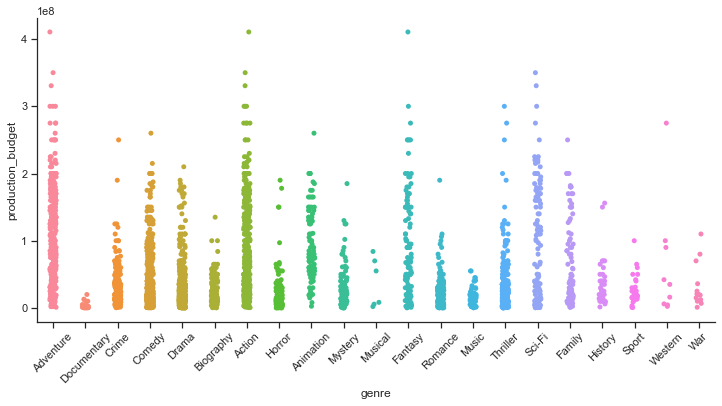

In [127]:
# plot comparing genres of profitable movies vs their production budgets
production = genres[['production_budget', 'genre']]
sns.set_theme(style = "ticks", color_codes = True)
sns.catplot(x='genre', y='production_budget', data = production, aspect=20/10)
plt.xticks(rotation = 45);

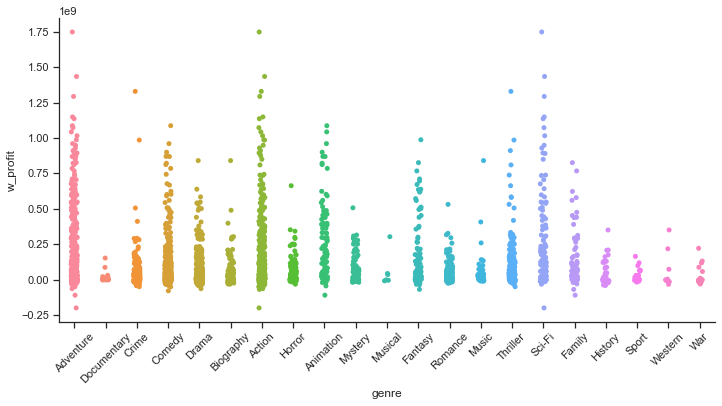

In [128]:
wprofit = genres[['w_profit', 'genre']]
sns.set_theme(style = "ticks", color_codes = True)
sns.catplot(x='genre', y='w_profit', data = wprofit, aspect=20/10)
plt.xticks(rotation = 45);

In [183]:
genres.to_csv('genres')

## Analyzing Profitability and Genres

In [135]:
#grouping by genres to assertain how successful particular genres are and link them to certain metrics

genres_t = genres

In [150]:
genres_t = genres.groupby(by=["genre"]).describe().T

In [151]:
genres_t

genre                    Action   Adventure  Animation   Biography  \
averagerating count  396.000000  327.000000  95.000000  120.000000   
              mean     6.386869    6.480734   6.547368    7.073333   
              std      0.922176    0.928731   1.064799    0.680674   
              min      1.900000    3.200000   1.900000    4.600000   
              25%      5.800000    5.900000   6.100000    6.700000   
...                         ...         ...        ...         ...   
d_roi         min      0.000000    0.000000   0.000000    0.000000   
              25%      0.408500    0.553189   0.755396    0.323175   
              50%      0.842715    0.935324   1.141660    1.046363   
              75%      1.363408    1.488422   1.680984    2.454546   
              max      7.951394    7.108748   5.140545   17.887776   

genre                    Comedy       Crime  Documentary       Drama  \
averagerating count  462.000000  203.000000    25.000000  611.000000   
              mean     6.242424    6.426108     6.672000    6.608838   
              std      0.948784    0.871074     1.332141    0.900357   
              min      1.900000    3.600000     1.600000    3.300000   
              25%      5.700000    5.850000     6.400000    6.100000   
...                         ...         ...          ...         ...   
d_roi         min      0.000000    0.000000     0.000000    0.000000   
              25%      0.632104    0.312614     0.040112    0.333571   
              50%      1.214953    0.893296     1.219316    0.942388   
              75%      2.252131    1.540971     2.359104    2.205033   
              max     16.245939    8.866745    12.897620   22.796861   

genre                   Family     Fantasy  ...      Horror      Music  \
averagerating count  81.000000  113.000000  ...  135.000000  44.000000   
              mean    6.145679    6.141593  ...    5.677037   6.350000   
              std     0.980440    0.848710  ...    0.919275   1.087883   
              min     3.800000    4.200000  ...    3.200000   1.600000   
              25%     5.600000    5.500000  ...    5.150000   5.875000   
...                        ...         ...  ...         ...        ...   
d_roi         min     0.000000    0.000000  ...    0.000000   0.001540   
              25%     0.503728    0.410775  ...    0.328728   0.761288   
              50%     1.075187    0.750256  ...    1.111721   1.357606   
              75%     1.744467    1.375748  ...    3.978737   2.358229   
              max    11.926050   16.016673  ...  227.644100   7.555090   

genre                 Musical     Mystery     Romance      Sci-Fi      Sport  \
averagerating count  6.000000  107.000000  173.000000  116.000000  26.000000   
              mean   6.000000    6.152336    6.324277    6.603448   6.930769   
              std    1.504659    1.077501    0.835888    0.930912   0.751409   
              min    3.300000    3.200000    4.100000    4.200000   5.300000   
              25%    5.750000    5.300000    5.800000    6.000000   6.500000   
...                       ...         ...         ...         ...        ...   
d_roi         min    0.001218    0.000000    0.000000    0.001056   0.000000   
              25%    0.186509    0.484307    0.556384    0.502531   0.374879   
              50%    0.505703    1.149971    1.242981    1.122713   1.092790   
              75%    0.675394    3.086633    2.703540    2.062503   1.791034   
              max    2.075478  227.644100   17.887776    7.951394   8.510637   

genre                  Thriller        War   Western  
averagerating count  213.000000  15.000000  9.000000  
              mean     6.128169   6.640000  6.766667  
              std      1.061040   0.826179  0.823104  
              min      3.200000   5.500000  5.500000  
              25%      5.400000   6.150000  6.400000  
...                         ...        ...       ...  
d_roi         min      0.000000   0.000000  0.025955  
    

In [249]:
#genres_mean = genres.groupby(by=["genre"]).mean().T
genres_mean = genres.groupby(by=["genre"]).mean()

In [250]:
genres_mean

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,w_roi,d_roi
genre,,,,,,,,,
Action,6.386869,193516.992424,8.623990e+07,9.610946e+07,2.651108e+08,9.869557e+06,1.788709e+08,2.819903,1.135014
Adventure,6.480734,206573.477064,1.101544e+08,1.277712e+08,3.620707e+08,1.761676e+07,2.519162e+08,3.169351,1.220756
Animation,6.547368,120654.073684,9.856842e+07,1.353075e+08,3.745825e+08,3.673906e+07,2.760140e+08,3.734554,1.401851
Biography,7.073333,118309.025000,2.647058e+07,4.179543e+07,8.628918e+07,1.532484e+07,5.981860e+07,3.611556,1.846571
Comedy,6.242424,97046.506494,4.221294e+07,6.147788e+07,1.402451e+08,1.926494e+07,9.803214e+07,3.283266,1.761457
Crime,6.426108,124324.502463,3.407645e+07,3.930877e+07,8.777435e+07,5.232321e+06,5.369790e+07,2.293179,1.191512
Documentary,6.672000,10775.480000,3.767920e+06,1.268088e+07,1.714562e+07,8.912958e+06,1.337770e+07,3.176817,2.288999
Drama,6.608838,109626.757774,2.839957e+07,3.531033e+07,7.781134e+07,6.910754e+06,4.941176e+07,3.378358,1.761161
Family,6.145679,81690.111111,7.162840e+07,7.906330e+07,1.949254e+08,7.434909e+06,1.232970e+08,2.692664,1.461552


In [251]:
genres_median = genres.groupby(by=["genre"]).median()
genres_median

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,w_roi,d_roi
genre,,,,,,,,,
Action,6.40,132173.0,62000000.0,51787306.5,140153206.0,-6075833.0,70608978.0,2.248743,0.842715
Adventure,6.50,133355.0,102000000.0,85364450.0,258751370.0,-2587055.0,140361578.0,2.671141,0.935324
Animation,6.70,72551.0,85000000.0,111506430.0,311013181.0,18415853.0,196392649.0,2.997873,1.141660
Biography,7.20,44381.0,20000000.0,20965326.0,36083759.5,955967.5,18395522.0,2.199427,1.046363
Comedy,6.30,58691.0,28000000.0,39164358.0,69859581.5,4036413.0,36001541.0,2.478868,1.214953
Crime,6.50,76557.0,30000000.0,25124986.0,46844357.0,-1948341.0,18909910.0,1.756917,0.893296
Documentary,6.90,1897.0,2000000.0,1109276.0,1131261.0,631261.0,884276.0,1.940266,1.219316
Drama,6.70,59229.0,19000000.0,19701164.0,36773510.0,-199852.0,14660323.0,2.029552,0.942388
Family,6.30,37325.0,45000000.0,59699513.0,101379287.0,2130219.0,55695194.0,2.080789,1.075187


In [261]:
#Genres Median table, but only 7 selected genres included

seven = ["Documentary", "Animation", "Family", "Action", "Comedy", "Drama", "Sci-Fi"]

genres_median_seven = genres.groupby(["genre"]).median().apply(seven)
genres_median_seven


,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,w_roi,d_roi
Documentary,6.9,1897.0,2000000.0,1109276.0,1131261.0,631261.0,884276.0,1.940266,1.219316
Animation,6.7,72551.0,85000000.0,111506430.0,311013181.0,18415853.0,196392649.0,2.997873,1.141660
Family,6.3,37325.0,45000000.0,59699513.0,101379287.0,2130219.0,55695194.0,2.080789,1.075187
Action,6.4,132173.0,62000000.0,51787306.5,140153206.0,-6075833.0,70608978.0,2.248743,0.842715
Comedy,6.3,58691.0,28000000.0,39164358.0,69859581.5,4036413.0,36001541.0,2.478868,1.214953
Drama,6.7,59229.0,19000000.0,19701164.0,36773510.0,-199852.0,14660323.0,2.029552,0.942388
Sci-Fi,6.6,219846.0,105000000.0,83530821.0,258665076.5,3830744.5,138725697.5,2.971889,1.122713


## CRITICAL TO PROJECT: ADDED 9/16 - 7 GENRES NARROWED DOWN BY "Microsoft" RELEVANCE AND GROUPED BY MEDIAN NUMBERS

Text(0.5, 1.0, 'Genres vs. Median ROI')

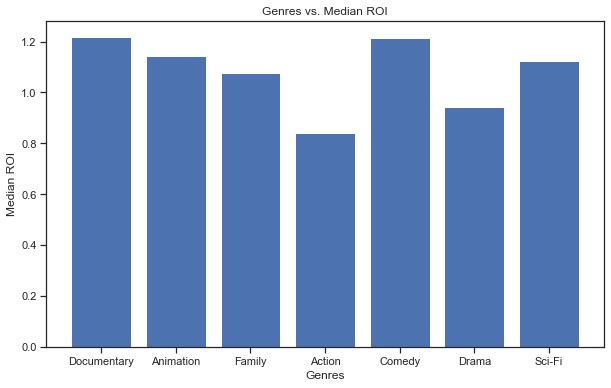

In [286]:
genres_median_seven
#First table : each of 7 genres, and median ROI
#i want X to be my table's index, and Y to be each row's median ROI

bar1_title = "Genres vs. Median ROI"
xlabel = "Genres"
ylabel = "Median ROI"

imdb_pop, ax = plt.subplots(figsize=(10,6))
xx=genres_median_seven.index
yy=genres_median_seven["d_roi"]

ax.bar(xx,yy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(bar1_title)


Text(0.5, 1.0, 'Genres vs. Median AverageRating')

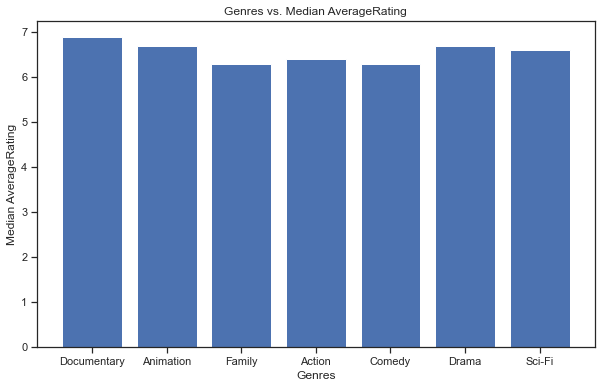

In [294]:
#SECOND IMPORTANT CHART: 

genres_median_seven
#First table : each of 7 genres, and median averagerating
#i want X to be my table's index, and Y to be each row's median average rating

bar1_title = "Genres vs. Median AverageRating"
xlabel = "Genres"
ylabel = "Median AverageRating"

avggenrerating, ax = plt.subplots(figsize=(10,6))
xx=genres_median_seven.index
yy=genres_median_seven["averagerating"]

ax.bar(xx,yy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(bar1_title)


In [144]:
droi_by_genre = genres_t.loc["d_roi"]

In [145]:
droi_by_genre

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
count,396.000000,327.000000,95.000000,120.000000,462.000000,203.000000,25.000000,611.000000,81.000000,113.000000,...,135.000000,44.000000,6.000000,107.000000,173.000000,116.000000,26.000000,213.000000,15.000000,9.000000
mean,1.135014,1.220756,1.401851,1.846571,1.761457,1.191512,2.288999,1.761161,1.461552,1.446741,...,5.225823,1.931172,0.650028,5.093471,2.097786,1.593837,1.424698,3.358698,0.640384,1.025090
std,1.212408,1.093264,1.087119,2.463005,1.973373,1.279214,3.330682,2.661224,1.679415,2.378005,...,20.127744,1.803230,0.749812,22.282567,2.710654,1.627097,1.681623,16.021377,0.851516,1.554370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001540,0.001218,0.000000,0.000000,0.001056,0.000000,0.000000,0.000000,0.025955
25%,0.408500,0.553189,0.755396,0.323175,0.632104,0.312614,0.040112,0.333571,0.503728,0.410775,...,0.328728,0.761288,0.186509,0.484307,0.556384,0.502531,0.374879,0.412978,0.021941,0.134913
50%,0.842715,0.935324,1.141660,1.046363,1.214953,0.893296,1.219316,0.942388,1.075187,0.750256,...,1.111721,1.357606,0.505703,1.149971,1.242981,1.122713,1.092790,0.978285,0.324298,0.324735
75%,1.363408,1.488422,1.680984,2.454546,2.252131,1.540971,2.359104,2.205033,1.744467,1.375748,...,3.978737,2.358229,0.675394,3.086633,2.703540,2.062503,1.791034,2.177455,1.040560,1.038141
max,7.951394,7.108748,5.140545,17.887776,16.245939,8.866745,12.897620,22.796861,11.926050,16.016673,...,227.644100,7.555090,2.075478,227.644100,17.887776,7.951394,8.510637,227.644100,3.200594,4.892657


In [149]:
# most frequently made genres
#documentary has one of highest ROIs, hgihest ratings, less saturated market due to lower # count
# highest average ROI genres
# family has very high number of votes,, lots of people watching these, very popular

In [159]:
### TRYING TO: gather the genres that are not over saturated, aka have a lower "count". then see which ones have highest ratings
genres_count = genres["genre"].count()
genres_count
#droi_by_lowcount_and_rating = genres_count.loc["averagerating"]


3314

In [248]:
average_rating = genres_t.loc["averagerating"].T
#average_rating[average_rating["count"] < 300]
average_rating

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,396.0,6.386869,0.922176,1.9,5.800,6.40,7.000,8.8
Adventure,327.0,6.480734,0.928731,3.2,5.900,6.50,7.100,8.8
Animation,95.0,6.547368,1.064799,1.9,6.100,6.70,7.250,8.4
Biography,120.0,7.073333,0.680674,4.6,6.700,7.20,7.500,8.5
Comedy,462.0,6.242424,0.948784,1.9,5.700,6.30,6.900,8.8
Crime,203.0,6.426108,0.871074,3.6,5.850,6.50,7.000,8.3
Documentary,25.0,6.672000,1.332141,1.6,6.400,6.90,7.200,8.4
Drama,611.0,6.608838,0.900357,3.3,6.100,6.70,7.200,8.6
Family,81.0,6.145679,0.980440,3.8,5.600,6.30,6.900,8.0


In [156]:
droi_by_lowcount_and_rating.sort_values()

genre
Musical          6
Western          9
War             15
Documentary     25
Sport           26
History         37
Music           44
Family          81
Animation       95
Mystery        107
Fantasy        113
Sci-Fi         116
Biography      120
Horror         135
Romance        173
Crime          203
Thriller       213
Adventure      327
Action         396
Comedy         462
Drama          611
Name: averagerating, dtype: int64

In [180]:
quickgroup = genres.groupby(["genre"])["d_roi","averagerating","numvotes"].mean()
quickgroup.sort_values("d_roi", ascending=False)

<ipython-input-180-5f3c5356ce86>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quickgroup = genres.groupby(["genre"])["d_roi","averagerating","numvotes"].mean()


,d_roi,averagerating,numvotes
genre,,,
Horror,5.225823,5.677037,76243.614815
Mystery,5.093471,6.152336,137848.429907
Thriller,3.358698,6.128169,138078.845070
Documentary,2.288999,6.672000,10775.480000
Romance,2.097786,6.324277,84022.786127
Music,1.931172,6.350000,73188.068182
Biography,1.846571,7.073333,118309.025000
Comedy,1.761457,6.242424,97046.506494
Drama,1.761161,6.608838,109626.757774


In [182]:
quickgroup = genres.groupby(["genre"])["d_roi","averagerating","numvotes"].median()
quickgroup.sort_values("averagerating", ascending=False)

<ipython-input-182-dfe0d200c0b1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quickgroup = genres.groupby(["genre"])["d_roi","averagerating","numvotes"].median()


,d_roi,averagerating,numvotes
genre,,,
Biography,1.046363,7.20,44381.0
History,0.489109,7.10,55981.0
Sport,1.092790,7.10,36371.5
Documentary,1.219316,6.90,1897.0
Drama,0.942388,6.70,59229.0
Animation,1.141660,6.70,72551.0
Sci-Fi,1.122713,6.60,219846.0
Western,0.324735,6.60,27724.0
Adventure,0.935324,6.50,133355.0


## AFTER HOURS WORK

In [217]:
#break out our target Genres, Documentary and Sci Fi, and view production budget stats

target_genres = ["Documentary", "Sci-Fi"]
selected_genres = genres.loc[genres["genre"].isin(target_genres)]

In [238]:
#view production budget stats for each genre
genresbudget = selected_genres.groupby(["genre"])["genre","production_budget"].median()
genresbudget.sort_values("genre", ascending=False)

#Median production budget, sci fi: $105,000,000
#Median production budget, Documentary: $2,000,000

<ipython-input-238-5dbe82ac39d3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genresbudget = selected_genres.groupby(["genre"])["genre","production_budget"].median()


,production_budget
genre,
Sci-Fi,105000000.0
Documentary,2000000.0


In [239]:
genresbudget = selected_genres.groupby(["genre"])["genre","production_budget"].mean()
genresbudget.sort_values("genre", ascending=False)

#Mean production budget, sci fi: 104,100,000
#Mean production budget, Documentary: 3,768,000

<ipython-input-239-6bced83650df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genresbudget = selected_genres.groupby(["genre"])["genre","production_budget"].mean()


,production_budget
genre,
Sci-Fi,1.041006e+08
Documentary,3.767920e+06


There is barely a difference in the median and mean production budgets of Documentary and Sci Fi movies.

In [242]:
documentaries = genres[genres["genre"] == "Documentary"]
documentaries

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,w_roi,d_roi,genre
1,7.0,1190,2500000.0,100280.0,100280.0,-2399720.0,-2399720.0,0.040112,0.040112,Documentary
45,6.4,6466,2900000.0,101270.0,172867.0,-2798730.0,-2727133.0,0.059609,0.034921,Documentary
58,5.1,1244,400000.0,433588.0,433588.0,33588.0,33588.0,1.083970,1.083970,Documentary
108,6.9,364,5000000.0,6096582.0,16515203.0,1096582.0,11515203.0,3.303041,1.219316,Documentary
216,5.4,5449,9000000.0,11862398.0,17462398.0,2862398.0,8462398.0,1.940266,1.318044,Documentary
235,1.6,74978,13000000.0,73013910.0,99034125.0,60013910.0,86034125.0,7.618010,5.616455,Documentary
280,6.8,157,500000.0,1131261.0,1131261.0,631261.0,631261.0,2.262522,2.262522,Documentary
307,7.1,63,560000.0,3709.0,3709.0,-556291.0,-556291.0,0.006623,0.006623,Documentary
363,7.5,663,225000.0,1109276.0,1109276.0,884276.0,884276.0,4.930116,4.930116,Documentary
404,5.9,13034,12000000.0,25326071.0,32700439.0,13326071.0,20700439.0,2.725037,2.110506,Documentary


Text(0.5, 1.0, 'Production Budget vs Rating - Documentaries Only')

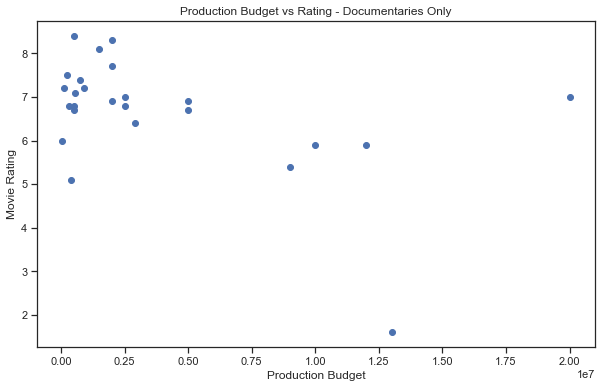

In [244]:
# Rating vs Production Budget for Documentaries

#see if there is an existing relationship between average rating and the production budget

scatter_title = "Production Budget vs Rating - Documentaries Only"
xlabel = "Production Budget"
ylabel = "Movie Rating"

docsbudget, ax = plt.subplots(figsize=(10,6))
x=documentaries["production_budget"]
y=documentaries["averagerating"]

ax.scatter(x,y)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)
#not strong correlation but its very low cost and will likely get high views and ratings regardless

In [245]:
#SciFi Only
scifi = genres[genres["genre"] == "Sci-Fi"]
scifi

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,w_roi,d_roi,genre
1342,6.9,28780,25000000.0,5958315.0,8.993300e+06,-19041685.0,-16006700.0,0.359732,0.238333,Sci-Fi
54,6.4,153962,36000000.0,50269859.0,6.596775e+07,14269859.0,29967750.0,1.832437,1.396385,Sci-Fi
88,6.4,84332,500000.0,237301.0,5.639730e+06,-262699.0,5139730.0,11.279460,0.474602,Sci-Fi
114,4.4,83710,10000000.0,21416355.0,6.826497e+07,11416355.0,58264973.0,6.826497,2.141636,Sci-Fi
243,7.4,492490,27000000.0,79249455.0,1.555649e+08,52249455.0,128564919.0,5.761664,2.935165,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...
1326,5.4,94888,88000000.0,51024708.0,1.594876e+08,-36975292.0,71487563.0,1.812359,0.579826,Sci-Fi
1339,7.5,88207,170000000.0,85710210.0,4.029760e+08,-84289790.0,232976036.0,2.370447,0.504178,Sci-Fi
1341,7.0,296225,175000000.0,426525952.0,1.123062e+09,251525952.0,948061550.0,6.417495,2.437291,Sci-Fi
1344,6.0,24451,350000000.0,42762350.0,1.497624e+08,-307237650.0,-200237650.0,0.427892,0.122178,Sci-Fi


Text(0.5, 1.0, 'Production Budget vs Rating - Sci-Fi Films Only')

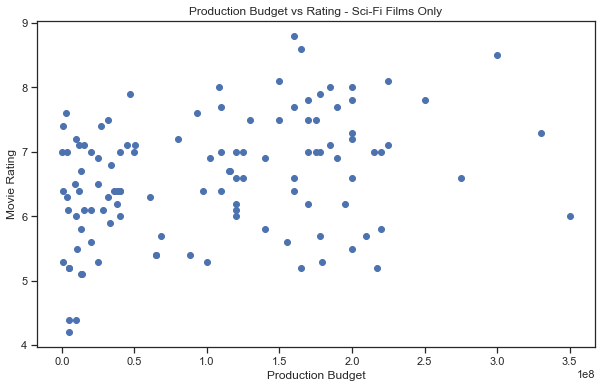

In [246]:
#Scifi rating vs budget
scatter_title = "Production Budget vs Rating - Sci-Fi Films Only"
xlabel = "Production Budget"
ylabel = "Movie Rating"

scifibudget, ax = plt.subplots(figsize=(10,6))
x=scifi["production_budget"]
y=scifi["averagerating"]

ax.scatter(x,y)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)